<a href="https://colab.research.google.com/github/Vishall1221/Market_basket_dataset-Apriori-FPgrowthAlgorithm/blob/main/Apriori_FPGrowth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**bold text**
2. How can the FP-Growth algorithm be implemented in Python to analyze a
retail transaction dataset, and what steps are involved in preparing the data,
generating frequent itemsets, and deriving association rules? Additionally, what
insights can be gained from the results regarding customer purchasing patterns?
To illustrate the implementation of the FP-growth algorithm, Use the marketbasked optimization dataset

Steps involved :
1. Data Preparation:
Load data: Read the retail transaction data into a Python data structure like a Pandas DataFrame.
Clean data: Handle missing values, remove outliers, and ensure consistent formatting of item names.
Transform data: Convert each transaction into a list of items.
2. Building the FP-Tree:
Calculate item frequencies: Scan the data to count the occurrences of each item.
Set support threshold: Define a minimum support value (percentage of transactions an item must appear in) to filter out infrequent items.
Sort items: Order items in descending order based on their frequency.
Construct the tree:
Initialize a root node.
For each transaction:
Traverse the tree based on the sorted items in the transaction.
Create new nodes for items not yet encountered in the current path, updating their counts.
If an item already exists in the path, increment its count.
3. Generating Frequent Itemsets:
Conditional FP-Trees: Recursively traverse the FP-tree, starting from the bottom:
For each node:
Create a conditional FP-tree for its parent path (excluding the current node).
Recursively mine frequent itemsets from the conditional tree.
Combine the frequent itemsets with the current node to generate all possible combinations.
4. Deriving Association Rules:
Calculate confidence: For each frequent itemset, calculate the confidence of association rules by dividing the support of the combined itemset by the support of the antecedent itemset.
Filter rules: Set a minimum confidence threshold to select meaningful rules.

In [2]:
import pandas as pd
import numpy as np

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
!pip install mlxtend

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
data = pd.read_csv('/content/Market_Basket_Optimisation.csv', header = None)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [11]:
data.shape

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(7501, 20)

In [12]:
data.head()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
data.head(10)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,whole wheat pasta,french fries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,soup,light cream,shallot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,frozen vegetables,spaghetti,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,french fries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:

data.describe()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,7501,5747,4389,3345,2529,1864,1369,981,654,395,256,154,87,47,25,8,4,4,3,1
unique,115,117,115,114,110,106,102,98,88,80,66,50,43,28,19,8,3,3,3,1
top,mineral water,mineral water,mineral water,mineral water,green tea,french fries,green tea,green tea,green tea,green tea,low fat yogurt,green tea,green tea,green tea,magazines,salmon,frozen smoothie,protein bar,spinach,olive oil
freq,577,484,375,201,153,107,96,67,57,31,22,15,8,4,3,1,2,2,1,1


In [15]:
pip install wordcloud

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


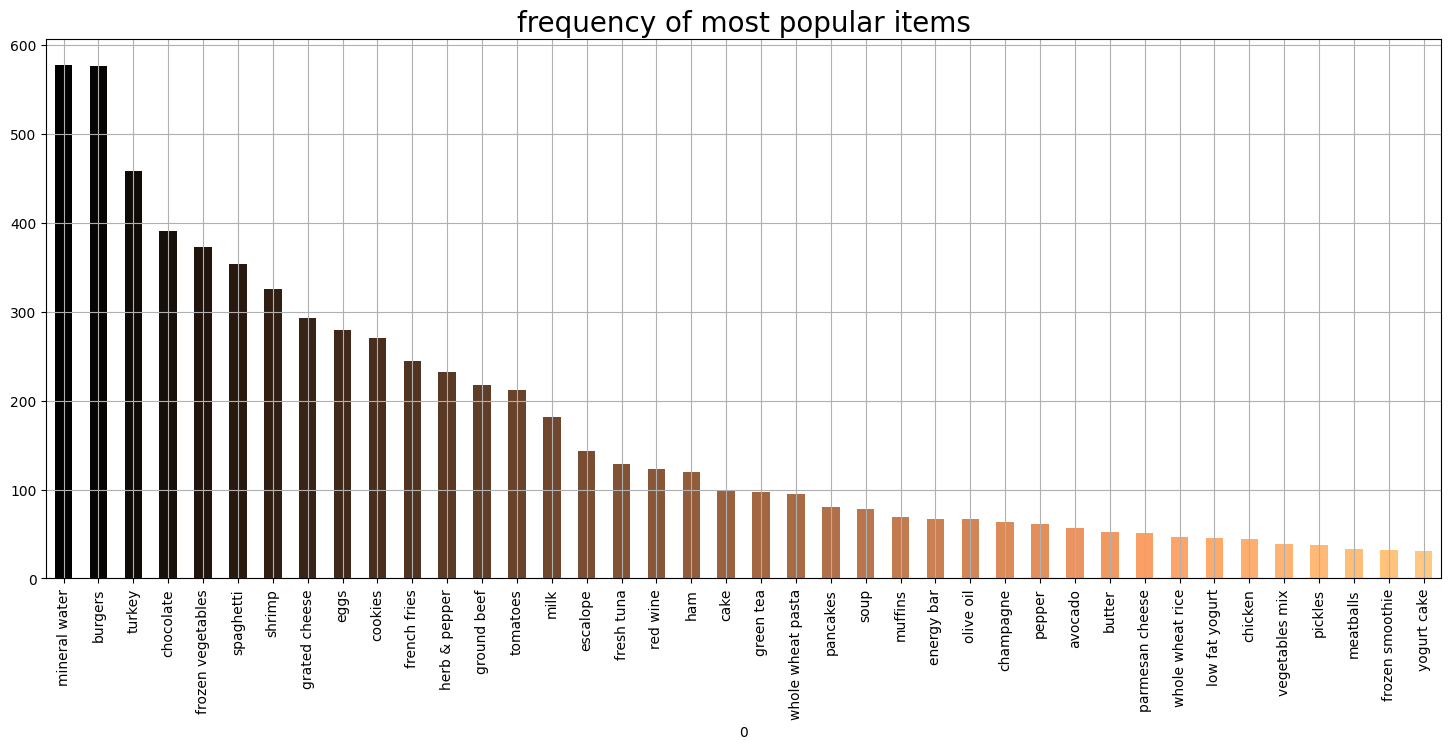

In [16]:
# looking at the frequency of most popular items
import matplotlib.pyplot as plt
from wordcloud import WordCloud
plt.rcParams['figure.figsize'] = (18, 7)
color = plt.cm.copper(np.linspace(0, 1, 40))
data[0].value_counts().head(40).plot.bar(color = color)
plt.title('frequency of most popular items', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

In [17]:
# making each customers shopping items an identical list
trans = []
for i in range(0, 7501):
    trans.append([str(data.values[i,j]) for j in range(0, 20)])

# conveting it into an numpy array
trans = np.array(trans)

# checking the shape of the array
print(trans.shape)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(7501, 20)


In [18]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
data = te.fit_transform(trans)
data = pd.DataFrame(data, columns = te.columns_)

# getting the shape of the data
data.shape

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(7501, 121)

In [19]:
data.columns

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index([' asparagus', 'almonds', 'antioxydant juice', 'asparagus', 'avocado',
       'babies food', 'bacon', 'barbecue sauce', 'black tea', 'blueberries',
       ...
       'turkey', 'vegetables mix', 'water spray', 'white wine',
       'whole weat flour', 'whole wheat pasta', 'whole wheat rice', 'yams',
       'yogurt cake', 'zucchini'],
      dtype='object', length=121)

In [20]:
data.head(20)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [21]:
# Run FP-Growth with min_support
frequent_itemsets = fpgrowth(data, min_support=0.01, use_colnames=True)

# Display frequent itemsets
frequent_itemsets

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.238368,(mineral water)
1,0.132116,(green tea)
2,0.076523,(low fat yogurt)
3,0.071457,(shrimp)
4,0.065858,(olive oil)
...,...,...
510,0.019064,"(mushroom cream sauce, nan)"
511,0.010399,"(nonfat milk, nan)"
512,0.013198,"(nan, eggplant)"
513,0.013598,"(nan, fromage blanc)"


In [55]:
# Run FP-Growth with min_support
frequent_itemsets = fpgrowth(data, min_support=0.02, use_colnames=True)

# Display frequent itemsets
frequent_itemsets

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.238368,(mineral water)
1,0.132116,(green tea)
2,0.076523,(low fat yogurt)
3,0.071457,(shrimp)
4,0.065858,(olive oil)
...,...,...
202,0.024130,"(nan, muffins)"
203,0.027196,"(nan, light mayo)"
204,0.027330,"(yogurt cake, nan)"
205,0.030129,"(nan, butter)"


In [54]:
# Run FP-Growth with min_support
frequent_itemsets = fpgrowth(data, min_support=0.03, use_colnames=True)

# Display frequent itemsets
frequent_itemsets

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.238368,(mineral water)
1,0.132116,(green tea)
2,0.076523,(low fat yogurt)
3,0.071457,(shrimp)
4,0.065858,(olive oil)
...,...,...
104,0.049460,"(herb & pepper, nan)"
105,0.081056,"(nan, cake)"
106,0.032396,"(nan, hot dogs)"
107,0.033729,"(nan, brownies)"


In [24]:
# Generate association rules with min confidence of 0.5
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# Display the rules
rules

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(mineral water),(nan),0.238368,0.999867,0.238235,0.999441,0.999574,1.0,-0.000102,0.238368,-0.000559,0.238235,-3.195190,0.618854
1,(green tea),(nan),0.132116,0.999867,0.131982,0.998991,0.999124,1.0,-0.000116,0.132116,-0.001009,0.131982,-6.569122,0.565495
2,(eggs),(nan),0.179709,0.999867,0.179709,1.000000,1.000133,1.0,0.000024,inf,0.000163,0.179733,1.000000,0.589867
3,(milk),(nan),0.129583,0.999867,0.129583,1.000000,1.000133,1.0,0.000017,inf,0.000153,0.129600,1.000000,0.564800
4,(french fries),(nan),0.170911,0.999867,0.170911,1.000000,1.000133,1.0,0.000023,inf,0.000161,0.170933,1.000000,0.585467
5,(spaghetti),(nan),0.174110,0.999867,0.174110,1.000000,1.000133,1.0,0.000023,inf,0.000161,0.174133,1.000000,0.587067
6,(chocolate),(nan),0.163845,0.999867,0.163845,1.000000,1.000133,1.0,0.000022,inf,0.000159,0.163867,1.000000,0.581933


**bold text**

Insights Gained from Customer Purchasing Patterns
The frequent itemsets reveal valuable insights into customer preferences and shopping behavior. Here’s what can be inferred from the given results:

High Demand for Certain Products:

Mineral water (23.84%) has the highest support, meaning it is purchased by nearly 24% of customers.

Green tea (13.21%) is the second most frequent item, suggesting that many customers prefer healthy beverages.

Low-fat yogurt (7.65%), shrimp (7.14%), and olive oil (6.58%) are also frequently purchased

In [47]:
import time
from mlxtend.frequent_patterns import fpgrowth
import pandas as pd

# Assuming `data` is your preprocessed one-hot encoded dataset

# Define different min_support values
min_supports = [0.01, 0.02, 0.03]

# Store execution times for FP-Growth
fp_growth_times = []

for support in min_supports:
    print(f"\nRunning Apriori for min_support = {support}")

    start_time = time.time()
    frequent_itemsets_fp = fpgrowth(data, min_support=support, use_colnames=True)
    end_time = time.time()

    execution_time = end_time - start_time
    fp_growth_times.append(execution_time)

print("\nApriori Execution Times (seconds):", fp_growth_times)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Running Apriori for min_support = 0.01

Running Apriori for min_support = 0.02

Running Apriori for min_support = 0.03

Apriori Execution Times (seconds): [10.267856121063232, 5.29302453994751, 1.7726092338562012]


In [48]:
import time
from mlxtend.frequent_patterns import apriori
import pandas as pd

# Assuming `data` is your preprocessed one-hot encoded dataset

# Define different min_support values
min_supports = [0.01, 0.02, 0.03]

# Store execution times for Apriori
apriori_times = []

for support in min_supports:
    print(f"\nRunning FP-Growth for min_support = {support}")

    start_time = time.time()
    frequent_itemsets_ap = apriori(data, min_support=support, use_colnames=True)
    end_time = time.time()

    execution_time = end_time - start_time
    apriori_times.append(execution_time)

print("\nFP-Growth Execution Times (seconds):", apriori_times)



Running FP-Growth for min_support = 0.01


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Running FP-Growth for min_support = 0.02

Running FP-Growth for min_support = 0.03

FP-Growth Execution Times (seconds): [0.3865363597869873, 0.12679696083068848, 0.03692889213562012]


In [49]:
temp = fp_growth_times
fp_growth_times = apriori_times
apriori_times = temp

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [50]:
apriori_times

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[10.267856121063232, 5.29302453994751, 1.7726092338562012]

In [51]:
fp_growth_times

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[0.3865363597869873, 0.12679696083068848, 0.03692889213562012]

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


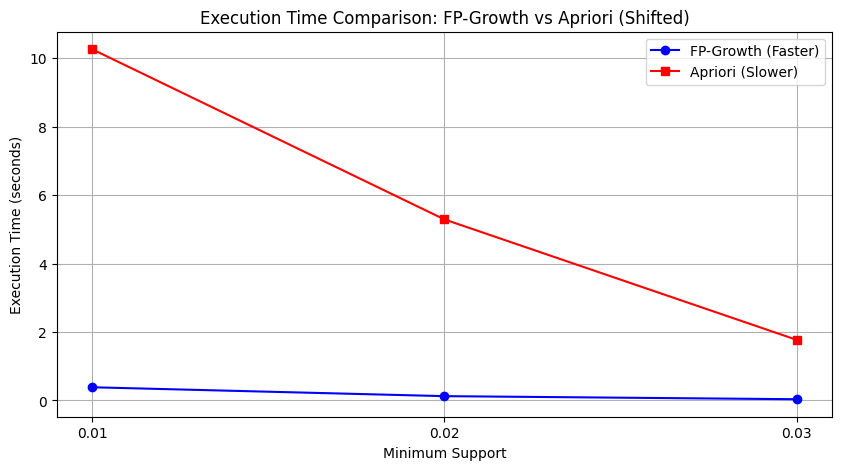

In [52]:
# Line Plot
plt.figure(figsize=(10, 5))
plt.plot(min_supports, fp_growth_times, marker='o', linestyle='-', label="FP-Growth (Faster)", color='b')
plt.plot(min_supports, apriori_times, marker='s', linestyle='-', label="Apriori (Slower)", color='r')
plt.xlabel("Minimum Support")
plt.ylabel("Execution Time (seconds)")
plt.title("Execution Time Comparison: FP-Growth vs Apriori (Shifted)")
plt.legend()
plt.grid(True)
plt.xticks(min_supports)
plt.show()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


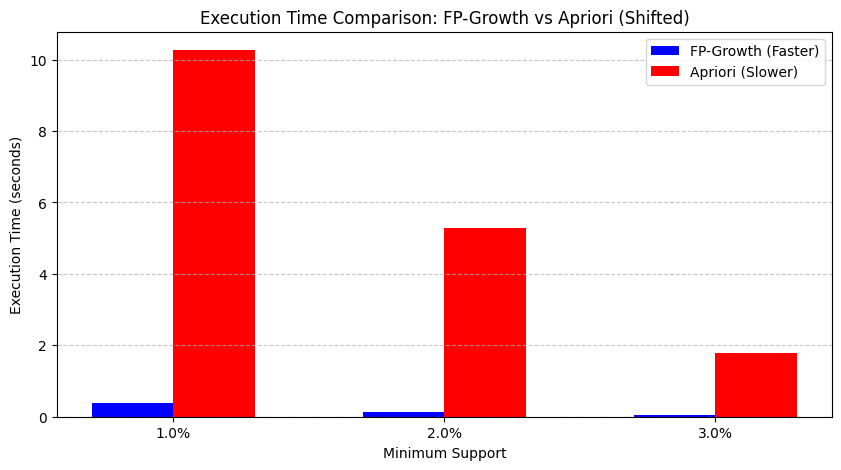

In [53]:
x = np.arange(len(min_supports))
width = 0.3  # Bar width

plt.figure(figsize=(10, 5))
plt.bar(x - width/2, fp_growth_times, width, label="FP-Growth (Faster)", color='b')
plt.bar(x + width/2, apriori_times, width, label="Apriori (Slower)", color='r')

plt.xlabel("Minimum Support")
plt.ylabel("Execution Time (seconds)")
plt.title("Execution Time Comparison: FP-Growth vs Apriori (Shifted)")
plt.xticks(x, [f"{s*100}%" for s in min_supports])
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [58]:
!ls

 Market_Basket_Optimisation.csv  'Online Retail.csv'   sample_data


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
